In [1]:
import pandas as pd
import numpy as np


# https://docs.scipy.org/doc/scipy/reference/stats.html

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data_xls = pd.read_excel('data_1.xlsx', 'Hoja1', index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [4]:
df = pd.read_csv('csvfile.csv',low_memory=False)

In [5]:
df.head()

,EDAD,EDAD <55 O >55,TIPO DE PARALISIS FACIAL,TIEMPO EVOLUCION,"<36 meses, >36 m",Nº INFILTRACIONES,GRADO ESCALA HOUSE-BRACKMANN,SUNNYBROOK PRE,SUNNYBROOK POST,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR,CUESTIONARIO DE SATISFACCIÓN,PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN TIRANTEZ,PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN SINCINESIAS,SEXO
0,42,0,2,12,0,1,2,45,50,65,24,1,5.67,5.00,MASCULINO
1,56,1,3,59,1,6,2,54,87,100,44,0,7.66,7.25,FEMENINO
2,61,1,2,78,1,7,3,57,72,100,36,0,9.00,10.00,FEMENINO
3,44,0,2,27,0,2,2,62,70,90,52,1,7.00,10.00,FEMENINO
4,69,1,2,27,0,3,3,27,48,50,28,1,7.25,7.25,MASCULINO


In [6]:
df.describe()

,EDAD,EDAD <55 O >55,TIPO DE PARALISIS FACIAL,TIEMPO EVOLUCION,"<36 meses, >36 m",Nº INFILTRACIONES,GRADO ESCALA HOUSE-BRACKMANN,SUNNYBROOK PRE,SUNNYBROOK POST,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR,CUESTIONARIO DE SATISFACCIÓN,PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN TIRANTEZ,PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN SINCINESIAS
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,52.258065,0.516129,1.741935,48.935484,0.580645,4.419355,2.548387,52.935484,70.290323,88.064516,46.322581,0.387097,7.857419,8.307419
std,18.633246,0.508001,0.855092,25.415134,0.501610,3.594201,0.675214,21.762254,19.597948,16.866012,13.886173,0.667204,2.007086,1.459066
min,15.000000,0.000000,0.000000,12.000000,0.000000,0.000000,2.000000,5.000000,26.000000,45.000000,24.000000,0.000000,0.000000,4.000000
25%,41.500000,0.000000,1.500000,27.000000,0.000000,2.000000,2.000000,40.000000,54.000000,82.500000,38.000000,0.000000,7.125000,7.500000
50%,56.000000,1.000000,2.000000,48.000000,1.000000,3.000000,2.000000,56.000000,75.000000,95.000000,44.000000,0.000000,8.250000,8.500000
75%,67.500000,1.000000,2.000000,71.500000,1.000000,6.500000,3.000000,63.500000,86.500000,100.000000,54.000000,1.000000,9.000000,9.625000
max,78.000000,1.000000,3.000000,94.000000,1.000000,14.000000,4.000000,96.000000,96.000000,115.000000,80.000000,3.000000,10.000000,10.000000


In [7]:
df.columns.values

array(['EDAD', 'EDAD <55 O >55', 'TIPO DE PARALISIS FACIAL',
       'TIEMPO EVOLUCION ', '<36 meses, >36 m', 'Nº INFILTRACIONES',
       'GRADO ESCALA HOUSE-BRACKMANN', 'SUNNYBROOK PRE',
       'SUNNYBROOK POST',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR ',
       'CUESTIONARIO DE SATISFACCIÓN',
       'PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN TIRANTEZ',
       'PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN SINCINESIAS',
       'SEXO'], dtype=object)

In [8]:
df.shape

(31, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
EDAD                                                                  31 non-null int64
EDAD <55 O >55                                                        31 non-null int64
TIPO DE PARALISIS FACIAL                                              31 non-null int64
TIEMPO EVOLUCION                                                      31 non-null int64
<36 meses, >36 m                                                      31 non-null int64
Nº INFILTRACIONES                                                     31 non-null int64
GRADO ESCALA HOUSE-BRACKMANN                                          31 non-null int64
SUNNYBROOK PRE                                                        31 non-null int64
SUNNYBROOK POST                                                       31 non-null int64
FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO                        31 non-null int64
FDI PUNTUACIÓN SU

In [11]:
df.shape

(31, 15)

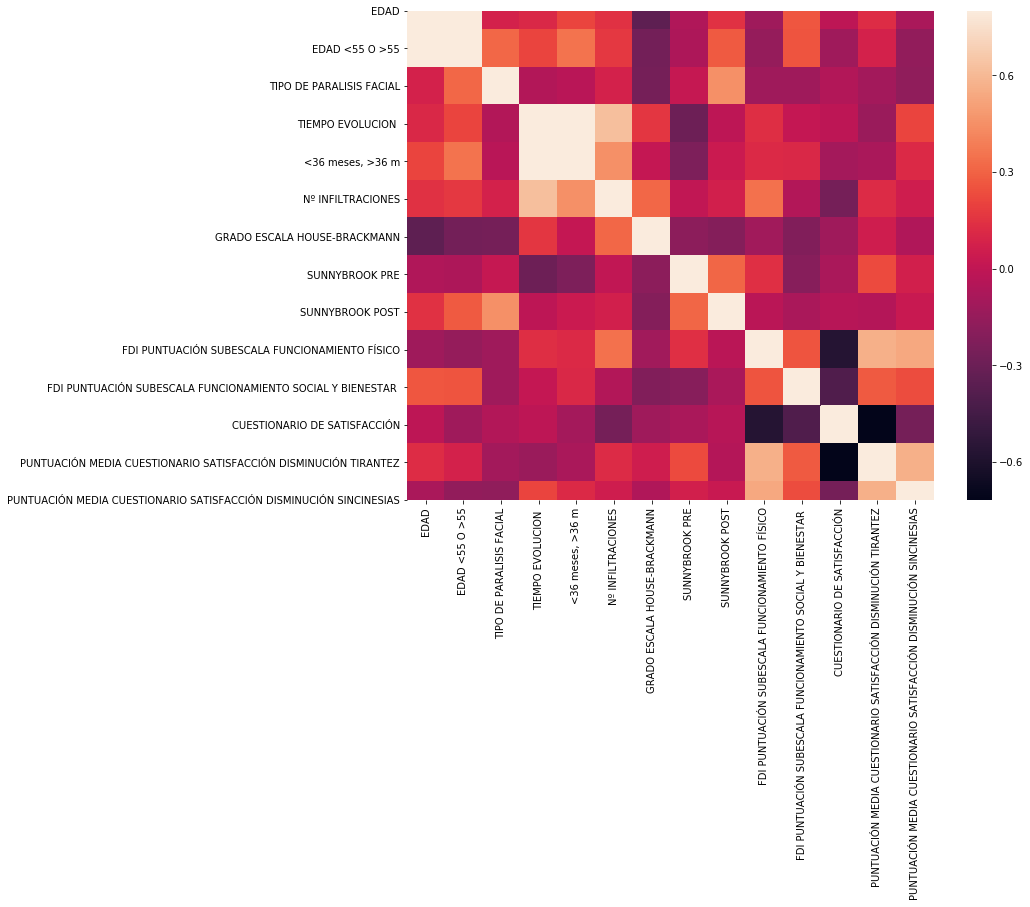

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

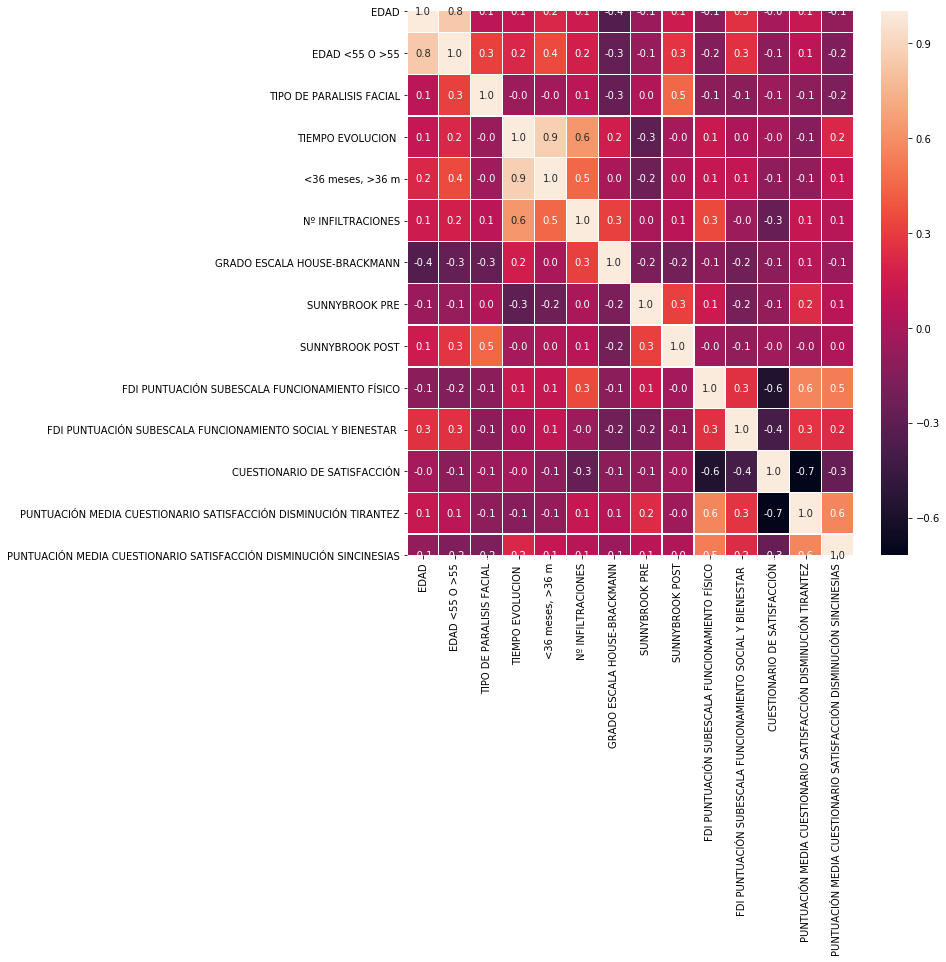

In [13]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '.1f',ax=ax)
plt.show()

In [14]:
df = df.drop(['EDAD', 'PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN TIRANTEZ', 'PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN SINCINESIAS'], axis=1)

In [15]:
df = df.drop(['TIEMPO EVOLUCION '], axis=1)

In [16]:
df.shape

(31, 11)

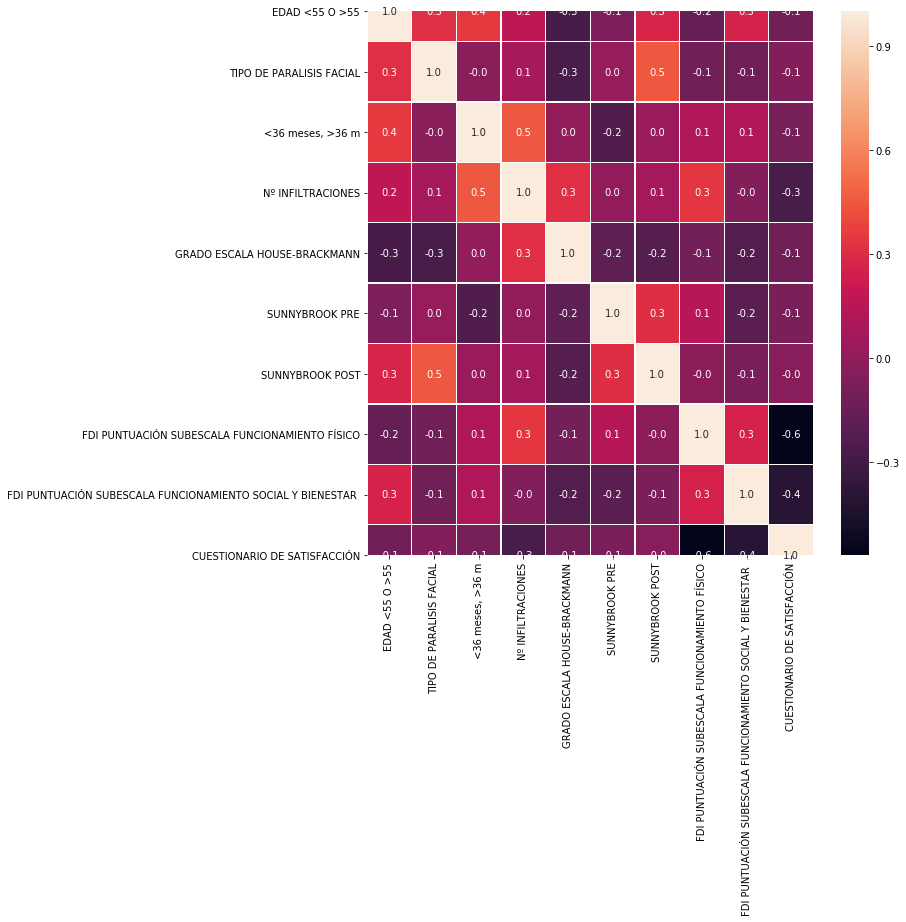

In [17]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '.1f',ax=ax)
plt.show()

In [18]:
df.cov()

,EDAD <55 O >55,TIPO DE PARALISIS FACIAL,"<36 meses, >36 m",Nº INFILTRACIONES,GRADO ESCALA HOUSE-BRACKMANN,SUNNYBROOK PRE,SUNNYBROOK POST,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR,CUESTIONARIO DE SATISFACCIÓN
EDAD <55 O >55,0.258065,0.137634,0.090323,0.309677,-0.092473,-0.765591,2.711828,-1.301075,1.827957,-0.039785
TIPO DE PARALISIS FACIAL,0.137634,0.731183,-0.011828,0.245161,-0.153763,0.382796,7.610753,-1.682796,-1.380645,-0.030108
"<36 meses, >36 m",0.090323,-0.011828,0.251613,0.815054,0.004301,-2.594624,0.359140,0.994624,0.739785,-0.032258
Nº INFILTRACIONES,0.309677,0.245161,0.815054,12.918280,0.762366,0.361290,4.574194,20.838710,-2.473118,-0.634409
GRADO ESCALA HOUSE-BRACKMANN,-0.092473,-0.153763,0.004301,0.762366,0.455914,-2.696774,-2.831183,-1.236559,-2.116129,-0.052688
SUNNYBROOK PRE,-0.765591,0.382796,-2.594624,0.361290,-2.696774,473.595699,133.186022,50.870968,-60.378495,-1.174194
SUNNYBROOK POST,2.711828,7.610753,0.359140,4.574194,-2.831183,133.186022,384.079570,-7.086022,-22.030108,-0.416129
FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO,-1.301075,-1.682796,0.994624,20.838710,-1.236559,50.870968,-7.086022,284.462366,59.978495,-6.392473
FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR,1.827957,-1.380645,0.739785,-2.473118,-2.116129,-60.378495,-22.030108,59.978495,192.825806,-3.729032
CUESTIONARIO DE SATISFACCIÓN,-0.039785,-0.030108,-0.032258,-0.634409,-0.052688,-1.174194,-0.416129,-6.392473,-3.729032,0.445161


In [19]:
df.columns.values

array(['EDAD <55 O >55', 'TIPO DE PARALISIS FACIAL', '<36 meses, >36 m',
       'Nº INFILTRACIONES', 'GRADO ESCALA HOUSE-BRACKMANN',
       'SUNNYBROOK PRE', 'SUNNYBROOK POST',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR ',
       'CUESTIONARIO DE SATISFACCIÓN', 'SEXO'], dtype=object)

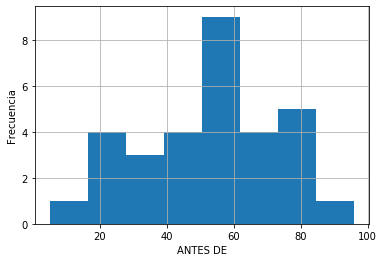

In [20]:
# histograma duración de erupciones con 8 barras
df['SUNNYBROOK PRE'].hist(bins=8) 
plt.xlabel("ANTES DE")
plt.ylabel("Frecuencia")
plt.show()


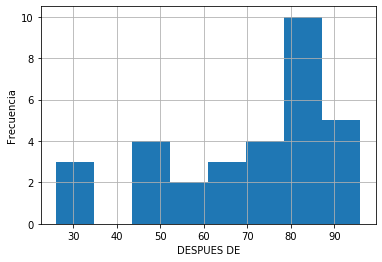

In [21]:
df['SUNNYBROOK POST'].hist(bins=8) 
plt.xlabel("DESPUES DE")
plt.ylabel("Frecuencia")
plt.show()

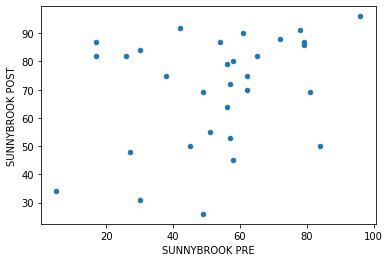

In [22]:
disp= df.plot(kind='scatter', x='SUNNYBROOK PRE', y='SUNNYBROOK POST')

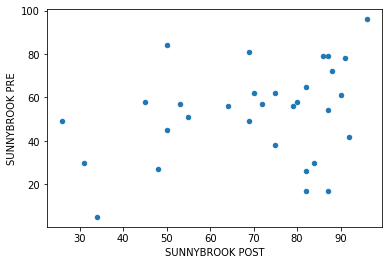

In [23]:
disp1= df.plot(kind='scatter', x='SUNNYBROOK POST', y='SUNNYBROOK PRE')

* y = b0 +b1x (y = SUNNYBROOK POST, x = SUNNYBROOK PRE )

In [24]:
df = df.rename(columns={'SUNNYBROOK PRE':'x', 'SUNNYBROOK POST':'y'})

In [25]:
sx=df['x'].sum()
print(sx)

1641


In [26]:
sy=df['y'].sum()
print(sy)


2179


In [27]:
sx=df['x'].sum()
print(sx)

1641


In [28]:
sy=df['y'].sum()
print(sy)

2179


In [29]:
df['x2'] = df['x'].apply(lambda x: pow(x, 2))

In [30]:
df['y2'] = df['y'].apply(lambda x: pow(x, 2))

In [31]:
df.columns.values

array(['EDAD <55 O >55', 'TIPO DE PARALISIS FACIAL', '<36 meses, >36 m',
       'Nº INFILTRACIONES', 'GRADO ESCALA HOUSE-BRACKMANN', 'x', 'y',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR ',
       'CUESTIONARIO DE SATISFACCIÓN', 'SEXO', 'x2', 'y2'], dtype=object)

In [32]:
s2x=df['x2'].sum()
s2y=df['y2'].sum()
print(s2x)
print(s2y)

101075
164685


In [33]:
df['xy'] = df['x']*df['y']

In [34]:
df.columns.values

array(['EDAD <55 O >55', 'TIPO DE PARALISIS FACIAL', '<36 meses, >36 m',
       'Nº INFILTRACIONES', 'GRADO ESCALA HOUSE-BRACKMANN', 'x', 'y',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR ',
       'CUESTIONARIO DE SATISFACCIÓN', 'SEXO', 'x2', 'y2', 'xy'],
      dtype=object)

In [35]:
sxy = df['xy'].sum()
print(sxy)

119342


In [36]:
n=len(df['x'])
print(n)

31


In [37]:
xp=df['x'].mean()
print(xp)

52.935483870967744


In [38]:
yp=df['y'].mean()
print(yp)

70.29032258064517


In [39]:
b1=(sxy-(1/n)*(sx*sy))/((s2x)-(1/n)*pow(sx,2))
print(b1)

0.28122303857016984


In [40]:
b0=yp-b1*xp
print(b0)

55.4036449582694


In [41]:
print('b1: ', b1)
print('b0: ', b0)

b1:  0.28122303857016984
b0:  55.4036449582694


In [42]:
import statsmodels.formula.api as smf

In [43]:
reg = smf.ols('y~x', data=df)

In [44]:
res=reg.fit()

In [45]:
print("Parametros: ")
print(res.params)

Parametros: 
Intercept    55.403645
x             0.281223
dtype: float64


In [46]:
df['ypre']=df['x'].apply(lambda x: b0 + b1*x)

In [47]:
df['yprest'] = res.predict(df['x'])

In [48]:
df.head()

,EDAD <55 O >55,TIPO DE PARALISIS FACIAL,"<36 meses, >36 m",Nº INFILTRACIONES,GRADO ESCALA HOUSE-BRACKMANN,x,y,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR,CUESTIONARIO DE SATISFACCIÓN,SEXO,x2,y2,xy,ypre,yprest
0,0,2,0,1,2,45,50,65,24,1,MASCULINO,2025,2500,2250,68.058682,68.058682
1,1,3,1,6,2,54,87,100,44,0,FEMENINO,2916,7569,4698,70.589689,70.589689
2,1,2,1,7,3,57,72,100,36,0,FEMENINO,3249,5184,4104,71.433358,71.433358
3,0,2,0,2,2,62,70,90,52,1,FEMENINO,3844,4900,4340,72.839473,72.839473
4,1,2,0,3,3,27,48,50,28,1,MASCULINO,729,2304,1296,62.996667,62.996667


In [49]:
df['ypro']=df['ypre'].apply(lambda x: x-yp)

In [50]:
df['ypro'] = df['ypro'].apply(lambda x: pow(x, 2))

In [51]:
df.head()

,EDAD <55 O >55,TIPO DE PARALISIS FACIAL,"<36 meses, >36 m",Nº INFILTRACIONES,GRADO ESCALA HOUSE-BRACKMANN,x,y,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR,CUESTIONARIO DE SATISFACCIÓN,SEXO,x2,y2,xy,ypre,yprest,ypro
0,0,2,0,1,2,45,50,65,24,1,MASCULINO,2025,2500,2250,68.058682,68.058682,4.980221
1,1,3,1,6,2,54,87,100,44,0,FEMENINO,2916,7569,4698,70.589689,70.589689,0.089620
2,1,2,1,7,3,57,72,100,36,0,FEMENINO,3249,5184,4104,71.433358,71.433358,1.306530
3,0,2,0,2,2,62,70,90,52,1,FEMENINO,3844,4900,4340,72.839473,72.839473,6.498170
4,1,2,0,3,3,27,48,50,28,1,MASCULINO,729,2304,1296,62.996667,62.996667,53.197412


In [52]:
print('SSR: ', df['ypro'].sum())

SSR:  1123.6493298844164


In [53]:
ssr=b1*(sxy-(1/n)*sx*sy)

In [54]:
print('SSR: ', ssr)

SSR:  1123.649329884417


In [55]:
print('SSRsm: ', round(res.mse_model, 0))

SSRsm:  1124.0


In [56]:
df['resta']=df['y']-df['ypre']

In [57]:
df['resta'] = df['resta'].apply(lambda x: pow(x, 2))

In [58]:
print('SSE: ', df['resta'].sum())

SSE:  10398.737766889772


In [59]:
print('SSRsm: ', round(res.ssr, 0))

SSRsm:  10399.0


In [60]:
df['yr'] = df['y'].apply(lambda x: x-yp)

In [61]:
df['yr'] = df['yr'].apply(lambda x: pow(x, 2))

In [62]:
print("SST: ", df['yr'].sum())

SST:  11522.387096774191


In [63]:
sst=s2y-(1/n)*pow(sy, 2)
print(sst)

11522.387096774211


In [64]:
sst2=ssr+df['resta'].sum()
print(sst2)

11522.38709677419


In [65]:
SSE = df['resta'].sum()

In [66]:
MSE=SSE/(n-2)
print('MSE: ', round(MSE, 2))

MSE:  358.58


In [67]:
print('MSEsm: ', round(res.mse_resid, 2))

MSEsm:  358.58


In [68]:
import math

In [69]:
print('Se: ', round(math.sqrt(MSE), 3))

Se:  18.936


In [70]:
msr = ssr/1

In [71]:
print('MSR: ', msr)

MSR:  1123.649329884417


In [72]:
from texttable import Texttable

In [73]:
t = Texttable()

In [74]:
t.add_rows([['Fuente', 'grados de libertad', 'SS', 'MS', 'F'], 
            ['Regresion', 1, ssr, msr, msr/MSE],
            ['Error', n-2, SSE, SSE/(n-2), ''],
            ['Total', n-1, sst, '', '']
          ])

In [75]:
print(t.draw())

+-----------+--------------------+-----------+----------+-------+
|  Fuente   | grados de libertad |    SS     |    MS    |   F   |
+===========+====================+===========+==========+=======+
| Regresion | 1                  | 1123.649  | 1123.649 | 3.134 |
+-----------+--------------------+-----------+----------+-------+
| Error     | 29                 | 10398.738 | 358.577  |       |
+-----------+--------------------+-----------+----------+-------+
| Total     | 30                 | 11522.387 |          |       |
+-----------+--------------------+-----------+----------+-------+


In [76]:
import statsmodels.api as sm

In [77]:
anova  = sm.stats.anova_lm(res, typ=2)

In [78]:
print(anova)

                sum_sq    df         F    PR(>F)
x          1123.649330   1.0  3.133633  0.087206
Residual  10398.737767  29.0       NaN       NaN


In [79]:
R=ssr/sst # coeficiente de correlacion entre x e y

In [80]:
print("R: ", round(R, 4)) # no estan correladas

R:  0.0975


In [81]:
print('StatsModels R: ', round(res.rsquared, 4))

StatsModels R:  0.0975


In [82]:
from numpy.polynomial.polynomial import polyfit

In [83]:
import matplotlib.pyplot as plt

In [84]:
x=df['x']
y=df['y']

In [85]:
b,m = polyfit(x,y,1)

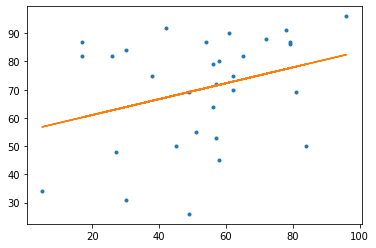

In [86]:
plt.plot(x,y, '.')
plt.plot(x, b+m*x, '-')
plt.show()

In [87]:
rmse = math.sqrt(MSE)

In [88]:
sb1=rmse/math.sqrt(s2x-(1-n)*pow(sx, 2))

In [89]:
t=b1/sb1

In [90]:
print(round(t, 4))

133.5673


In [91]:
from scipy import stats

In [92]:
a=0.05/2

In [93]:
q=1-a

In [94]:
gld=n-2

In [95]:
p=stats.t.ppf(q, gld, )

In [96]:
print(p)

2.045229642132703


In [97]:
if p < abs(t) :
    print('Se rechaza H0, por lo tanto si existe dependencia')
if p > abs(t) :
    print('Se rechaza H0, por lo tanto si existe dependencia ')

Se rechaza H0, por lo tanto si existe dependencia


In [98]:
F=msr/MSE

In [99]:
print('F :', F)

F : 3.1336332636835413


In [100]:
gln=1
gld=n-2
a=0.05
q=1-a

In [101]:
c=stats.f.pdf(q, dfn=gln, dfd=gld)

In [102]:
print(c)

0.2502203652698088


In [103]:
if  F > c:
    print('Rechazamos H0, por lo tanto, el modelo es significativo y = b0 + b1x')

Rechazamos H0, por lo tanto, el modelo es significativo y = b0 + b1x


In [104]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

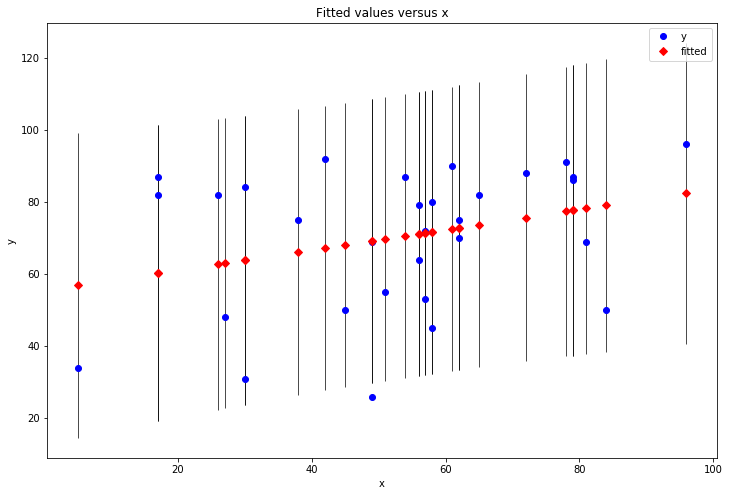

In [105]:
fig, ax = plt.subplots(figsize = (12, 8))
fig = sm.graphics.plot_fit(res,'x', ax=ax)

In [106]:
import seaborn as sns

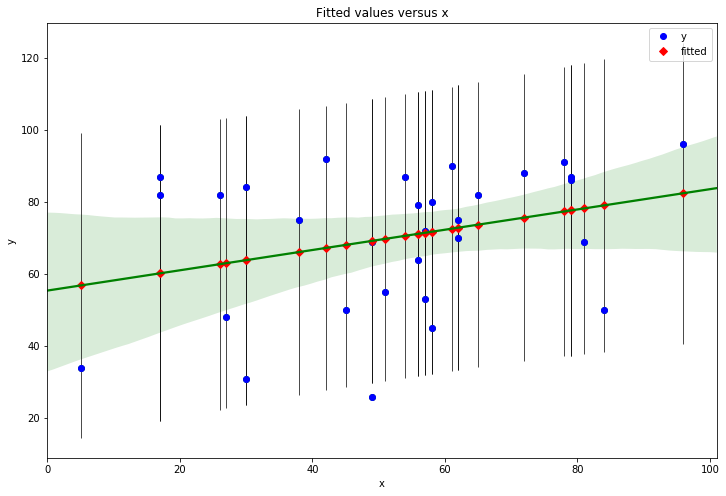

In [107]:



fig, ax = plt.subplots(figsize = (12, 8))
fig = sm.graphics.plot_fit(res,'x', ax=ax)
ax = sns.regplot(x=df['x'],y=df['y'],  color='g', ci=95 )

################################################################################################

In [108]:
data_xls = pd.read_excel('data_1.xlsx', 'Hoja1', index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [109]:
df = pd.read_csv('csvfile.csv',low_memory=False)

In [110]:
df = df.drop(['EDAD', 'PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN TIRANTEZ', 'PUNTUACIÓN MEDIA CUESTIONARIO SATISFACCIÓN DISMINUCIÓN SINCINESIAS'], axis=1)

In [111]:
df = df.drop(['TIEMPO EVOLUCION '], axis=1)

In [112]:
df = df.rename(columns={'SUNNYBROOK PRE':'y','SUNNYBROOK POST':'x'})

In [113]:
sx=df['x'].sum()
print(sx)

2179


In [114]:
sy=df['y'].sum()
print(sy)

1641


In [115]:
df['x2'] = df['x'].apply(lambda x: pow(x, 2))

In [116]:
df['y2'] = df['y'].apply(lambda x: pow(x, 2))

In [117]:
df.columns.values

array(['EDAD <55 O >55', 'TIPO DE PARALISIS FACIAL', '<36 meses, >36 m',
       'Nº INFILTRACIONES', 'GRADO ESCALA HOUSE-BRACKMANN', 'y', 'x',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR ',
       'CUESTIONARIO DE SATISFACCIÓN', 'SEXO', 'x2', 'y2'], dtype=object)

In [118]:
s2x=df['x2'].sum()
s2y=df['y2'].sum()
print(s2x)
print(s2y)

164685
101075


In [119]:
df['xy'] = df['x']*df['y']

In [120]:
df.columns.values

array(['EDAD <55 O >55', 'TIPO DE PARALISIS FACIAL', '<36 meses, >36 m',
       'Nº INFILTRACIONES', 'GRADO ESCALA HOUSE-BRACKMANN', 'y', 'x',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO',
       'FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR ',
       'CUESTIONARIO DE SATISFACCIÓN', 'SEXO', 'x2', 'y2', 'xy'],
      dtype=object)

In [121]:
sxy = df['xy'].sum()
print(sxy)

119342


In [122]:
n=len(df['x'])
print(n)

31


In [123]:
xp=df['x'].mean()
print(xp)

70.29032258064517


In [124]:
yp=df['y'].mean()
print(yp)

52.935483870967744


In [125]:
b1=(sxy-(1/n)*(sx*sy))/((s2x)-(1/n)*pow(sx,2))
print(b1)

0.3467667430024013


In [126]:
b0=yp-b1*xp
print(b0)

28.56113764508928


In [127]:
print('b1: ', b1)
print('b0: ', b0)

b1:  0.3467667430024013
b0:  28.56113764508928


In [128]:
import statsmodels.formula.api as smf

In [129]:
reg = smf.ols('y~x', data=df)

In [130]:
res=reg.fit()

In [131]:
print("Parametros: ")
print(res.params)

Parametros: 
Intercept    28.561138
x             0.346767
dtype: float64


In [132]:
df['ypre']=df['x'].apply(lambda x: b0 + b1*x)

In [133]:
df['yprest'] = res.predict(df['x'])

In [134]:
df.head()

,EDAD <55 O >55,TIPO DE PARALISIS FACIAL,"<36 meses, >36 m",Nº INFILTRACIONES,GRADO ESCALA HOUSE-BRACKMANN,y,x,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR,CUESTIONARIO DE SATISFACCIÓN,SEXO,x2,y2,xy,ypre,yprest
0,0,2,0,1,2,45,50,65,24,1,MASCULINO,2500,2025,2250,45.899475,45.899475
1,1,3,1,6,2,54,87,100,44,0,FEMENINO,7569,2916,4698,58.729844,58.729844
2,1,2,1,7,3,57,72,100,36,0,FEMENINO,5184,3249,4104,53.528343,53.528343
3,0,2,0,2,2,62,70,90,52,1,FEMENINO,4900,3844,4340,52.834810,52.834810
4,1,2,0,3,3,27,48,50,28,1,MASCULINO,2304,729,1296,45.205941,45.205941


In [135]:
df['ypro']=df['ypre'].apply(lambda x: x-yp)

In [136]:
df['ypro'] = df['ypro'].apply(lambda x: pow(x, 2))

In [137]:
df.head()

,EDAD <55 O >55,TIPO DE PARALISIS FACIAL,"<36 meses, >36 m",Nº INFILTRACIONES,GRADO ESCALA HOUSE-BRACKMANN,y,x,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO FÍSICO,FDI PUNTUACIÓN SUBESCALA FUNCIONAMIENTO SOCIAL Y BIENESTAR,CUESTIONARIO DE SATISFACCIÓN,SEXO,x2,y2,xy,ypre,yprest,ypro
0,0,2,0,1,2,45,50,65,24,1,MASCULINO,2500,2025,2250,45.899475,45.899475,49.505424
1,1,3,1,6,2,54,87,100,44,0,FEMENINO,7569,2916,4698,58.729844,58.729844,33.574613
2,1,2,1,7,3,57,72,100,36,0,FEMENINO,5184,3249,4104,53.528343,53.528343,0.351482
3,0,2,0,2,2,62,70,90,52,1,FEMENINO,4900,3844,4340,52.834810,52.834810,0.010135
4,1,2,0,3,3,27,48,50,28,1,MASCULINO,2304,729,1296,45.205941,45.205941,59.745828


In [138]:
print('SSR: ', df['ypro'].sum())

SSR:  1385.5344867260105


In [139]:
ssr=b1*(sxy-(1/n)*sx*sy)

In [140]:
print('SSR: ', ssr)

SSR:  1385.534486726018


In [141]:
print('SSRsm: ', round(res.mse_model, 0))

SSRsm:  1386.0


In [142]:
df['resta']=df['y']-df['ypre']

In [143]:
df['resta'] = df['resta'].apply(lambda x: pow(x, 2))

In [144]:
print('SSE: ', df['resta'].sum())

SSE:  12822.336481015918


In [145]:
print('SSRsm: ', round(res.ssr, 0))

SSRsm:  12822.0


In [146]:
df['yr'] = df['y'].apply(lambda x: x-yp)

In [147]:
df['yr'] = df['yr'].apply(lambda x: pow(x, 2))

In [148]:
print("SST: ", df['yr'].sum())

SST:  14207.870967741936


In [149]:
sst=s2y-(1/n)*pow(sy, 2)
print(sst)

14207.87096774194


In [150]:
sst2=ssr+df['resta'].sum()
print(sst2)

14207.870967741936


In [151]:
SSE = df['resta'].sum()

In [152]:
MSE=SSE/(n-2)
print('MSE: ', round(MSE, 2))

MSE:  442.15


In [153]:
print('MSEsm: ', round(res.mse_resid, 2))

MSEsm:  442.15


In [154]:
import math

In [155]:
print('Se: ', round(math.sqrt(MSE), 3))

Se:  21.027


In [156]:
msr = ssr/1

In [157]:
print('MSR: ', msr)

MSR:  1385.534486726018


In [158]:
from texttable import Texttable

In [159]:
t = Texttable()

In [160]:
t.add_rows([['Fuente', 'grados de libertad', 'SS', 'MS', 'F'], 
            ['Regresion', 1, ssr, msr, msr/MSE],
            ['Error', n-2, SSE, SSE/(n-2), ''],
            ['Total', n-1, sst, '', '']
          ])

In [161]:
print(t.draw())

+-----------+--------------------+-----------+----------+-------+
|  Fuente   | grados de libertad |    SS     |    MS    |   F   |
+===========+====================+===========+==========+=======+
| Regresion | 1                  | 1385.534  | 1385.534 | 3.134 |
+-----------+--------------------+-----------+----------+-------+
| Error     | 29                 | 12822.336 | 442.150  |       |
+-----------+--------------------+-----------+----------+-------+
| Total     | 30                 | 14207.871 |          |       |
+-----------+--------------------+-----------+----------+-------+


In [162]:
anova  = sm.stats.anova_lm(res, typ=2)

In [163]:
print(anova)

                sum_sq    df         F    PR(>F)
x          1385.534487   1.0  3.133633  0.087206
Residual  12822.336481  29.0       NaN       NaN


In [164]:
R=ssr/sst # coeficiente de correlacion entre x e y

In [165]:
print("R: ", round(R, 4)) # no estan correladas

R:  0.0975


In [166]:
print('StatsModels R: ', round(res.rsquared, 4))

StatsModels R:  0.0975


In [167]:
from numpy.polynomial.polynomial import polyfit

In [168]:
import matplotlib.pyplot as plt

In [169]:
x=df['x']
y=df['y']

In [170]:
b,m = polyfit(x,y,1)

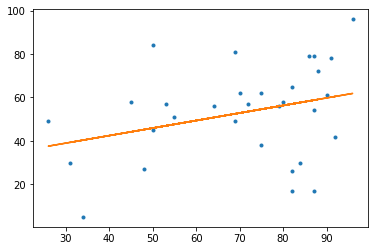

In [171]:
plt.plot(x,y, '.')
plt.plot(x, b+m*x, '-')
plt.show()

* H0 : B1 (PENDIENTE) = 0, ES DECIR NO HAY RELACION ENTRE X E Y
* H1 : B1 ES DISTINTO DE CERO , ES DECIR SI HAY UNA RELACION ENTRE X E Y

In [172]:
rmse = math.sqrt(MSE)

In [173]:
sb1=rmse/math.sqrt(s2x-(1-n)*pow(sx, 2))

In [174]:
t=b1/sb1

In [175]:
print(round(t, 4))

196.9344


In [176]:
from scipy import stats

In [177]:
a=0.05/2

In [178]:
q=1-a

In [179]:
gld=n-2

In [180]:
p=stats.t.ppf(q, gld, )

In [181]:
print(p)

2.045229642132703


In [182]:
if p < abs(t) :
    print('Se rechaza H0, por lo tanto si existe dependencia')
if p > abs(t) :
    print('Se rechaza H0, por lo tanto si existe dependencia ')

Se rechaza H0, por lo tanto si existe dependencia


In [183]:
F=msr/MSE

In [184]:
print('F :', F)

F : 3.133633263683547


In [185]:
gln=1
gld=n-2
a=0.05
q=1-a

In [186]:
c=stats.f.pdf(q, dfn=gln, dfd=gld)

In [187]:
print(c)

0.2502203652698088


In [188]:
if  F > c:
    print('Rechazamos H0, por lo tanto, el modelo es significativo y = b0 + b1x')

Rechazamos H0, por lo tanto, el modelo es significativo y = b0 + b1x


In [189]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

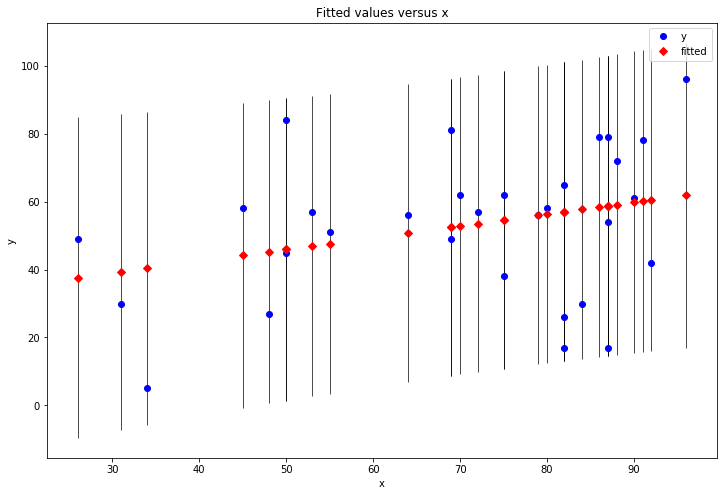

In [190]:
fig, ax = plt.subplots(figsize = (12, 8))
fig = sm.graphics.plot_fit(res,'x', ax=ax)

In [191]:
import seaborn as sns

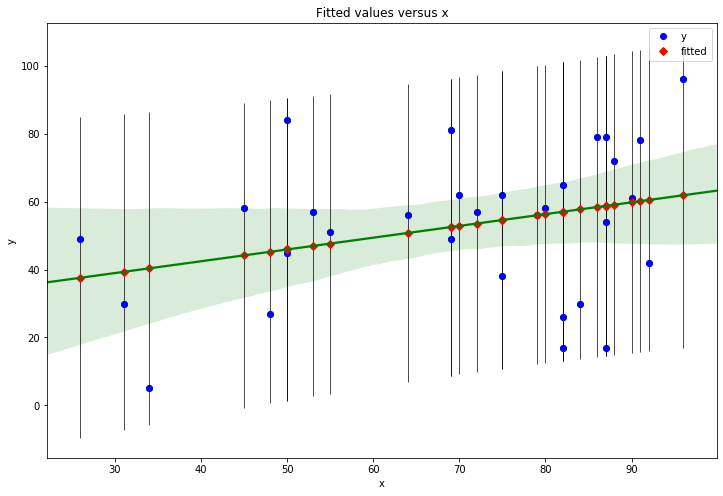

In [192]:
fig, ax = plt.subplots(figsize = (12, 8))
fig = sm.graphics.plot_fit(res,'x', ax=ax)
ax = sns.regplot(x=df['x'],y=df['y'],  color='g', ci=95 )

* Al aumentar un valor de un grupo aumenta otro, es decir, los pacientes mejoran con lo que se  le ha suministrado

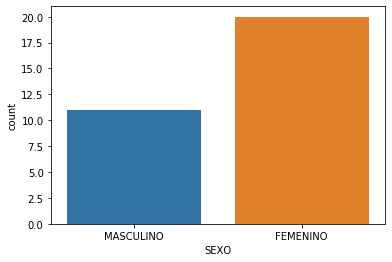

In [193]:
sns.countplot(df['SEXO'])

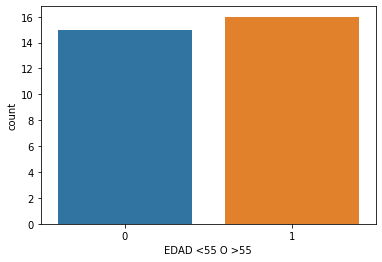

In [194]:
sns.countplot(df['EDAD <55 O >55'])

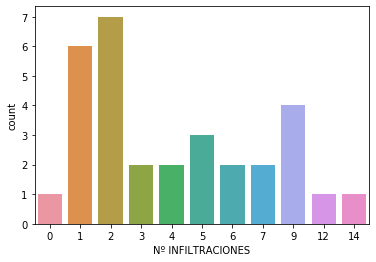

In [195]:
sns.countplot(df['Nº INFILTRACIONES'])

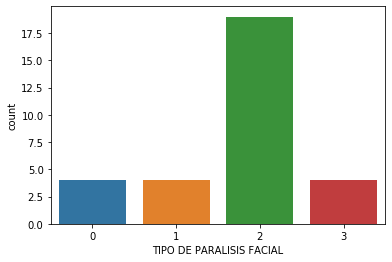

In [196]:
sns.countplot(df['TIPO DE PARALISIS FACIAL'])

In [197]:
import plotly.graph_objs as go 
import plotly.offline as py


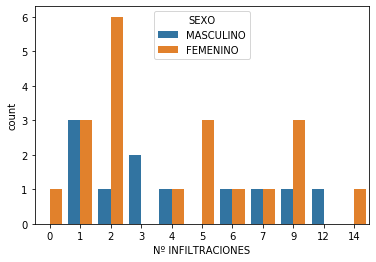

In [198]:
sns.countplot(df['Nº INFILTRACIONES'],hue=df['SEXO'])

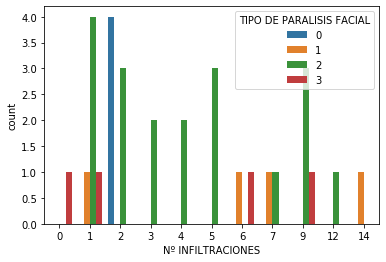

In [199]:
sns.countplot(df['Nº INFILTRACIONES'],hue=df['TIPO DE PARALISIS FACIAL'])

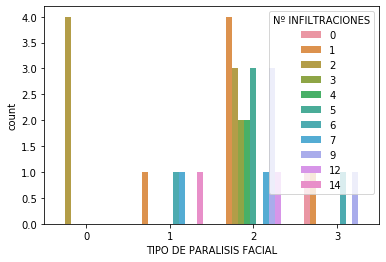

In [200]:
sns.countplot(df['TIPO DE PARALISIS FACIAL'],hue=df['Nº INFILTRACIONES'])

In [201]:
# INFILTRACIONES CON EDAD Y CON SEXO

In [202]:
df['combinado_Sexo_EDAD_55'] = df.apply(lambda x:'%s_%s' % (x['SEXO'],x['EDAD <55 O >55']),axis=1)
print(df['combinado_Sexo_EDAD_55'].unique())

['MASCULINO_0' 'FEMENINO_1' 'FEMENINO_0' 'MASCULINO_1']


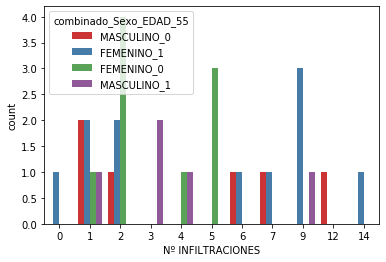

In [203]:
sns.countplot(df['Nº INFILTRACIONES'],hue=df['combinado_Sexo_EDAD_55'], orient='v', palette="Set1")

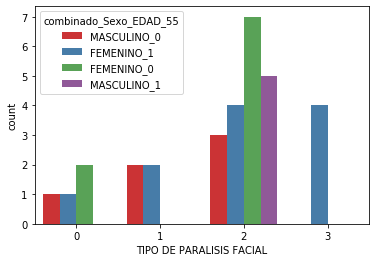

In [204]:
sns.countplot(df['TIPO DE PARALISIS FACIAL'],hue=df['combinado_Sexo_EDAD_55'], orient='v', palette="Set1")

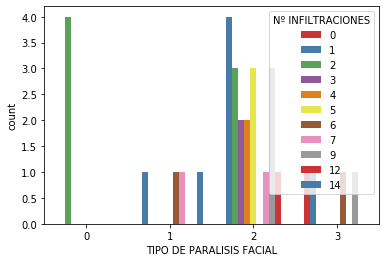

In [205]:
sns.countplot(df['TIPO DE PARALISIS FACIAL'],hue=df['Nº INFILTRACIONES'], orient='v', palette="Set1")

In [206]:
##############test t-student#######################

In [207]:
data_xls = pd.read_excel('data_1.xlsx', 'Hoja1', index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [208]:
df = pd.read_csv('csvfile.csv',low_memory=False)

In [209]:
df = df.rename(columns={'SUNNYBROOK PRE':'y','SUNNYBROOK POST':'x'})

In [210]:
var_x = df["x"].var(ddof=0)

In [211]:
var_y = df["y"].var(ddof=0)

In [212]:
s  = np.sqrt((var_x + var_y )/2)

In [213]:
s

20.371650947601307

In [214]:
N=31

In [215]:
t = (df["x"].mean() - df["y"].mean())/(s*np.sqrt(2/N))

In [216]:
df = 2*N - 2

In [217]:
p = 1 - stats.t.cdf(t,df=df)

In [218]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 3.3539779619161236
p = 0.0013847567441822584


In [219]:
# si t > p se rechaza HO, es decir, se rechaza que las dos distribuciones tengan la misma media

In [220]:
# H0:las dos poblam¡ciones tienen la misma madea
# H1: las dos poblaciones tienen distinta media

In [221]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 4.7487833069442145
p = 0.00016037635050714094
t = 4.7487833069442145
p = 0.000160376350507195


* Puede ver que después de comparar el estadístico t con el valor t crítico (calculado internamente) obtenemos un buen valor p de 0.0005 y, por lo tanto, rechazamos la hipótesis nula y demuestra que la media de las dos distribuciones es diferente y Estadísticamente significante.